# Aula de introdução ao problema de clusterização
Nesta aula, vamos examinar o problema de clusterização.
Vamos analisar o problema de ponto de vista qualitativo.
Este exemplo é meramente ilustrativo!

## Importando bibliotecas

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

## Preparando ambiente

In [ ]:
## Preparando o ambiente
if 'google.colab' in str(get_ipython()):
  !git clone https://github.com/tiagofiorini/MLinPhysics.git

## Carregando base de dados
Usando a função de leitura de arquivos Excel da biblioteca Pandas

In [21]:
dados = pd.read_excel('Clustering1.xlsx', index_col=None)

Para ter uma boa visualização, basta digitar o nome do dataframe

In [22]:
dados

,Grupo,Ângulo de abertura,Comprimento do fio,Instrumento de medida,Período de oscilação
0,Grupo 1,10.0,14.50,Régua,2.423
1,Grupo 2,NaN,14.45,Paquímetro,2.414
2,Grupo 3,20.0,14.50,NaN,2.437
3,Grupo 4,30.0,NaN,Paquímetro,2.456
4,Grupo 5,8.0,14.30,Régua,2.404
5,Grupo 6,15.0,14.50,Trena,2.428
6,Grupo 7,30.0,14.45,Régua,2.456
7,Grupo 8,32.0,14.40,Paquímetro,2.458
8,Grupo 9,35.0,14.50,Paquímetro,2.476
9,Grupo 10,33.0,14.48,Paquímetro,2.468


## Preparando a base de dados

In [24]:
dados_tratados = dados
dados_tratados['Instrumento de medida'] = dados_tratados['Instrumento de medida'].fillna(value='Trena')
dados_tratados["Ângulo de abertura"] = dados_tratados["Ângulo de abertura"].fillna(dados_tratados["Ângulo de abertura"].median())
dados_tratados['Comprimento do fio'] = dados_tratados['Comprimento do fio'].fillna(dados_tratados['Comprimento do fio'].median())
encoder = OneHotEncoder(categories=[['Régua','Trena','Paquímetro']])
encoder.fit_transform(dados_tratados['Instrumento de medida'].values.reshape(-1,1))
buffer = encoder.transform(dados_tratados['Instrumento de medida'].values.reshape(-1,1)).toarray()
dados_provisorio = pd.DataFrame(data=buffer, columns=['Régua','Trena','Paquímetro'])
dados_tratados = dados_tratados.join(dados_provisorio)
dados_tratados = dados_tratados.drop(columns=['Instrumento de medida'])
dados_tratados

,Grupo,Ângulo de abertura,Comprimento do fio,Período de oscilação,Régua,Trena,Paquímetro
0,Grupo 1,10.0,14.50,2.423,1.0,0.0,0.0
1,Grupo 2,30.0,14.45,2.414,0.0,0.0,1.0
2,Grupo 3,20.0,14.50,2.437,0.0,1.0,0.0
3,Grupo 4,30.0,14.50,2.456,0.0,0.0,1.0
4,Grupo 5,8.0,14.30,2.404,1.0,0.0,0.0
5,Grupo 6,15.0,14.50,2.428,0.0,1.0,0.0
6,Grupo 7,30.0,14.45,2.456,1.0,0.0,0.0
7,Grupo 8,32.0,14.40,2.458,0.0,0.0,1.0
8,Grupo 9,35.0,14.50,2.476,0.0,0.0,1.0
9,Grupo 10,33.0,14.48,2.468,0.0,0.0,1.0


## Visualizando os dados
Exercite a visualização dos dados para melhor entender se há ou não uma separação em grupos de medidas.

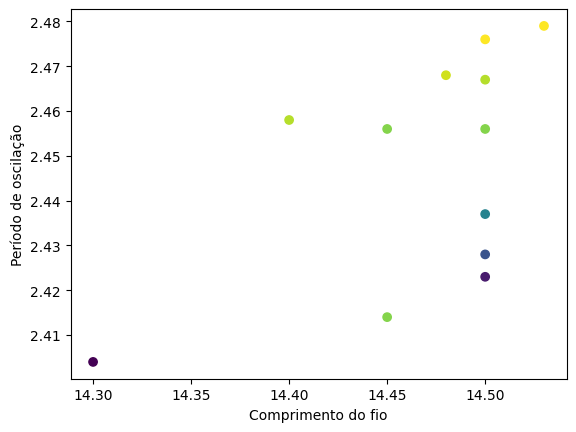

In [48]:
plt.scatter(dados_tratados['Comprimento do fio'],dados_tratados['Período de oscilação'],c=dados_tratados['Ângulo de abertura'])
plt.xlabel('Comprimento do fio')
plt.ylabel('Período de oscilação');

## Desafio: Tente uma visualização 3D dos dados